In [1]:
import datetime as dt
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import tetrion.plots as plots
import tetrion.db
import tetrion.commands as cmd
import tetrion.options
import tetrion.clientcore
import seaborn as sns
from collections import defaultdict
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline 
symbol = pd.read_csv('/local/dist/tetrion/conf/conf/symbol.table', skiprows= 1, header = 2,  delim_whitespace=True)
import redis
import json
import matplotlib.dates as mdates
from tabulate import tabulate


In [2]:
def get_fills_from_redis(strat = 'capital_txo_main', acc='TAIFEX100',date=dt.date.today(),night_session=True, redishost='prod1.capital.radiant-knight.com'):
    r = redis.StrictRedis(host=redishost, port=6379,db=0)
    rk = '{}:{}'.format(acc, date.strftime('%Y%m%d'))
    rk_strat = '{}:{}'.format(strat, date.strftime('%Y%m%d')) 
#     rk = '*{}*'.format(acc)
    if night_session:
        rk = rk + 'E'
        rk_strat = rk_strat + 'E'
    if rk not in [k.decode() for k in r.keys()]:
        print('Key:{} not exists!'.format(rk))
        if rk_strat in [k.decode() for k in r.keys()]: 
            rk = rk_strat
        else:
            return None
    msgs = r.lrange(rk, 0, -1)
#     print(msgs)
    trd_df = pd.DataFrame([json.loads(m.decode()) for m in msgs])
    if trd_df.empty:
        print('Empty redis key')
        return None
    if trd_df['ts'][0] > 1e11:
        trd_df['time'] = trd_df['ts'].apply(lambda x:dt.datetime.fromtimestamp(x/1e6))
    else:
        trd_df['time'] = trd_df['ts'].apply(lambda x:dt.datetime.fromtimestamp(x))
    trd_df.set_index('time',inplace=True)

    return trd_df

In [3]:
df_dict = {}  # 用字典儲存每一天的df

for d in cmd.tdate(dt.date(2025, 3, 1), dt.date(2025, 3, 25), as_python_date=True, mkt='MKT_TAIFEX'):
    df = get_fills_from_redis('capital_electron_tmf', date=d,
                              redishost='prod1.capital.radiant-knight.com', night_session=True)
    if df is not None:
        df_dict[d] = df.reset_index()
    else:
        print(f"No data for {d}")

Key:TAIFEX100:20250303E not exists!
Key:TAIFEX100:20250304E not exists!
Key:TAIFEX100:20250305E not exists!
Key:TAIFEX100:20250306E not exists!
Key:TAIFEX100:20250307E not exists!
Key:TAIFEX100:20250310E not exists!
Key:TAIFEX100:20250311E not exists!
Key:TAIFEX100:20250312E not exists!
Key:TAIFEX100:20250313E not exists!
Key:TAIFEX100:20250314E not exists!
Key:TAIFEX100:20250317E not exists!
Key:TAIFEX100:20250318E not exists!
Key:TAIFEX100:20250319E not exists!
Key:TAIFEX100:20250320E not exists!
Key:TAIFEX100:20250321E not exists!
Key:TAIFEX100:20250324E not exists!
Key:TAIFEX100:20250325E not exists!


In [4]:
df0310=df_dict[dt.date(2025,3,4)]

In [6]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [17]:
cols_to_keep = ['time', 'instr','px', 'alqortake', 'sz','label']

In [19]:
df0310.columns

Index(['time', 'ts', 'instr', 'oflag', 'tid', 'px', 'alqortake', 'sz', 'theo',
       'fwd', 'ffwd', 'edge', 'roll_offset', 'label', 'delta', 'vega', 'gamma',
       'theta', 'vol', 'mult', 'latefill', 'fee', 'qm', 'pfdelta', 'otags',
       'seq'],
      dtype='object')

In [18]:
df_filtered04 = df0310[df0310['instr'].astype(str).str.contains('202504')][cols_to_keep]
df_filtered04

,time,instr,px,alqortake,sz,label
1475,2025-03-04 02:05:07.281488,FUT_TAIFEX_TMF:202504,22528,take,-2,
1476,2025-03-04 02:05:07.281520,FUT_TAIFEX_TXF:202504,22521,take,1,
1477,2025-03-04 02:05:07.281533,FUT_TAIFEX_TMF:202504,22527,take,-1,
1478,2025-03-04 02:05:07.281540,FUT_TAIFEX_TMF:202504,22526,take,-2,
1479,2025-03-04 02:05:07.281548,FUT_TAIFEX_TMF:202504,22525,take,-14,
1480,2025-03-04 02:07:30.789965,FUT_TAIFEX_TMF:202504,22505,take,-5,
1481,2025-03-04 02:07:30.790004,FUT_TAIFEX_TXF:202504,22497,take,1,
1482,2025-03-04 02:07:30.790018,FUT_TAIFEX_TMF:202504,22503,take,-1,
1483,2025-03-04 02:07:30.790026,FUT_TAIFEX_TMF:202504,22502,take,-2,
1484,2025-03-04 02:07:30.790034,FUT_TAIFEX_TMF:202504,22501,take,-2,


In [18]:
filtered_df = df0310[df0310["instr"].str.contains("202504")]
filtered_df2 = filtered_df[(filtered_df['time'].dt.time >= pd.to_datetime('21:30').time()) &
                     (filtered_df['time'].dt.time <= pd.to_datetime('21:31').time())]

In [19]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [20]:
filtered_df

,time,ts,instr,oflag,tid,px,alqortake,sz,theo,fwd,ffwd,edge,roll_offset,label,delta,vega,gamma,theta,vol,mult,latefill,fee,qm,pfdelta,otags,seq
213,2025-03-07 21:30:00.918667,1741354200918667,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274593,22469,take,-1,22468.5,22468.5,22463,0,0,,1,0,0,0,0,10,False,1.24938,0,0,0x0,239
214,2025-03-07 21:30:00.918766,1741354200918766,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274593,22468,take,-9,22467.0,22467.0,22463,0,0,,1,0,0,0,0,10,False,1.24936,0,0,0x0,240
215,2025-03-07 21:30:00.918780,1741354200918780,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274593,22466,take,-5,22465.5,22465.5,22463,0,0,,1,0,0,0,0,10,False,1.24932,0,0,0x0,241
216,2025-03-07 21:30:00.918790,1741354200918790,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274593,22465,take,-1,22464.5,22464.5,22463,0,0,,1,0,0,0,0,10,False,1.24930,0,0,0x0,242
217,2025-03-07 21:30:00.918797,1741354200918797,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274593,22464,take,-2,0.0,0.0,22463,0,0,,1,0,0,0,0,10,False,1.24928,0,0,0x0,243
218,2025-03-07 21:30:00.918805,1741354200918805,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274593,22463,take,-1,22470.5,22470.5,22463,0,0,,1,0,0,0,0,10,False,1.24926,0,0,0x0,244
221,2025-03-07 21:30:00.919431,1741354200919431,FUT_TAIFEX_TXF:202504,0,TAIFEX155#274596,22479,take,1,22468.0,22468.0,22463,0,0,BS_HDG,1,0,0,0,0,200,False,0.48958,0,0,0x0,247
223,2025-03-07 21:30:01.061657,1741354201061657,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274673,22461,take,-1,22460.5,22460.5,22450.5,0,0,,1,0,0,0,0,10,False,1.24922,0,0,0x0,249
224,2025-03-07 21:30:01.061710,1741354201061710,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274673,22460,take,-10,22459.0,22459.0,22450.5,0,0,,1,0,0,0,0,10,False,1.24920,0,0,0x0,250
225,2025-03-07 21:30:01.061719,1741354201061719,FUT_TAIFEX_TMF:202504,0,TAIFEX155#274673,22458,take,-2,22457.0,22457.0,22450.5,0,0,,1,0,0,0,0,10,False,1.24916,0,0,0x0,251


In [23]:
def compute_cumulative_pnl_by_product(df):
    """
    根據每筆交易的價格、口數與乘數，計算每商品的累積已實現損益、剩餘口數及標記損益（使用當前最新價格）。
    計算邏輯採用平均成本法，不使用 FIFO 配對。
    
    輸入 df 需包含欄位：'time', 'instr', 'px', 'sz', 'mult'
      - sz：正數代表買進，負數代表賣出
      - mult：乘數
    
    輸出結果會增加以下欄位：
      - cum_realized：累積已實現損益
      - remaining_qty：剩餘部位口數（正值為多單，負值為空單）
      - avg_cost：目前的平均成本（若無持倉則為 NaN）
      - total_pnl：總損益 = 已實現損益 + 未實現損益（未實現部分以本次交易價格標記）
    """
    import pandas as pd

    # 依時間排序
    df = df.sort_values('time').reset_index(drop=True)
    
    # 用來存放每個商品的狀態：position, avg_cost, realized
    state = {}
    
    # 用來記錄每筆交易更新後的狀態
    cum_realized_list = []
    total_pnl_list = []
    remaining_qty_list = []
    avg_cost_list = []
    
    for idx, row in df.iterrows():
        instr = row['instr']
        price = row['px']
        qty = row['sz']
        mult = row['mult']
        
        # 若此商品無狀態，初始化
        if instr not in state:
            state[instr] = {'position': 0, 'avg_cost': None, 'realized': 0}
        s = state[instr]
        pos = s['position']
        avg_cost = s['avg_cost']
        realized = s['realized']
        
        # 情境1：無部位時，新開部位
        if pos == 0:
            new_pos = qty
            new_avg = price
            realized_trade = 0
        else:
            # 情境2：持倉方向與新單相同 (pos * qty > 0)
            if pos * qty > 0:
                new_pos = pos + qty
                # 加權平均成本
                new_avg = (avg_cost * abs(pos) + price * abs(qty)) / abs(new_pos)
                realized_trade = 0
            else:
                # 方向相反，代表平倉（可能部分平倉或反轉）
                if abs(qty) <= abs(pos):
                    new_pos = pos + qty
                    # 平倉損益依方向計算：
                    if pos > 0:
                        # 多單平倉：損益 = (平倉價格 - 平均成本) * 平倉口數 * mult
                        realized_trade = (price - avg_cost) * abs(qty) * mult
                    else:
                        # 空單平倉：損益 = (平均成本 - 平倉價格) * 平倉口數 * mult
                        realized_trade = (avg_cost - price) * abs(qty) * mult
                    new_avg = avg_cost  # 未完全平倉時，平均成本保持不變
                else:
                    # 完全平倉後還反轉成新部位：
                    closed_qty = abs(pos)
                    if pos > 0:
                        realized_trade = (price - avg_cost) * closed_qty * mult
                    else:
                        realized_trade = (avg_cost - price) * closed_qty * mult
                    new_pos = pos + qty  # 此時 new_pos 的符號與 pos 相反
                    new_avg = price  # 新開倉部位以當前價格作成本
        
        # 更新狀態
        s['position'] = new_pos
        s['avg_cost'] = new_avg
        s['realized'] = realized + realized_trade
        
        # 計算未實現損益：以本次交易價格作為標記價格
        if new_pos == 0:
            unrealized = 0
        else:
            if new_pos > 0:
                unrealized = (price - new_avg) * abs(new_pos) * mult
            else:
                unrealized = (new_avg - price) * abs(new_pos) * mult
        total = s['realized'] + unrealized
        
        # 記錄結果
        cum_realized_list.append(s['realized'])
        total_pnl_list.append(total)
        remaining_qty_list.append(new_pos)
        avg_cost_list.append(new_avg)
    
    df['cum_realized'] = cum_realized_list
    df['remaining_qty'] = remaining_qty_list
    df['avg_cost'] = avg_cost_list
    df['total_pnl'] = total_pnl_list
    
    return df


In [24]:
pnl_dict = {date: compute_cumulative_pnl_by_product(df) for date, df in df_dict.items()}

# 查看範例
pnl_dict[dt.date(2025, 3, 7)]

,time,ts,instr,oflag,tid,px,alqortake,sz,theo,fwd,...,latefill,fee,qm,pfdelta,otags,seq,cum_realized,remaining_qty,avg_cost,total_pnl
0,2025-03-06 15:06:28.371292,1741244788371292,FUT_TAIFEX_TMF:202503,0,TAIFEX155#5529,22790,alq,1,22791.5,22791.5,...,False,1.25580,0,0,0x20000,6,0.0,1,22790.000000,0.0
1,2025-03-06 15:06:34.901035,1741244794901035,FUT_TAIFEX_TMF:202503,0,TAIFEX155#5772,22793,alq,-1,22792.5,22792.5,...,False,1.25586,0,0,0x20000,7,30.0,0,22790.000000,30.0
2,2025-03-06 15:06:46.035378,1741244806035378,FUT_TAIFEX_TMF:202503,0,TAIFEX155#6041,22801,alq,1,22801.5,22801.5,...,False,1.25602,0,0,0x20000,8,30.0,1,22801.000000,30.0
3,2025-03-06 15:06:48.055518,1741244808055518,FUT_TAIFEX_TMF:202503,0,TAIFEX155#6077,22804,alq,-1,22803.5,22803.5,...,False,1.25608,0,0,0x20000,9,60.0,0,22801.000000,60.0
4,2025-03-06 15:07:03.568784,1741244823568784,FUT_TAIFEX_TMF:202503,0,TAIFEX155#6609,22794,alq,2,22795.0,22795.0,...,False,1.25588,0,0,0x20000,10,60.0,2,22794.000000,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2025-03-07 04:59:25.354204,1741294765354204,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22442,take,-1,22440.5,22440.5,...,False,1.24884,0,0,0x0,1119,-620.0,-141,22449.056738,9330.0
1114,2025-03-07 04:59:25.354240,1741294765354240,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22439,take,-8,22437.5,22437.5,...,False,1.24878,0,0,0x0,1120,-620.0,-149,22448.516779,13560.0
1115,2025-03-07 04:59:25.354249,1741294765354249,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22436,take,-1,22435.5,22435.5,...,False,1.24872,0,0,0x0,1121,-620.0,-150,22448.433333,18030.0
1116,2025-03-07 04:59:25.354256,1741294765354256,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22435,take,-2,22434.0,22434.0,...,False,1.24870,0,0,0x0,1122,-620.0,-152,22448.256579,19530.0


In [16]:
def compute_cumulative_pnl(df):
    import pandas as pd
    # 假設資料中的時間欄位為 time，依時間排序
    df = df.sort_values('time').reset_index(drop=True)
    # 計算每筆交易的現金流：直接用價格 * sz * mult
    # 注意：如果你的資料中正的 sz 表示買入（支出現金），而負的表示賣出（收入現金），
    # 那麼現金流應該取負值： pnl = - (px * sz * mult)
    # 這裡請依照你的資料規範調整 sign
    df['pnl'] = df['px'] * df['sz'] * df['mult']
    # 累計損益
    df['cum_pnl'] = df['pnl'].cumsum()
    return df


In [17]:
pnl_dict = {date: compute_cumulative_pnl(df) for date, df in df_dict.items()}

# 查看範例
pnl_dict[dt.date(2025, 3, 7)]

,time,ts,instr,oflag,tid,px,alqortake,sz,theo,fwd,...,vol,mult,latefill,fee,qm,pfdelta,otags,seq,pnl,cum_pnl
0,2025-03-06 15:06:28.371292,1741244788371292,FUT_TAIFEX_TMF:202503,0,TAIFEX155#5529,22790,alq,1,22791.5,22791.5,...,0,10,False,1.25580,0,0,0x20000,6,227900,227900
1,2025-03-06 15:06:34.901035,1741244794901035,FUT_TAIFEX_TMF:202503,0,TAIFEX155#5772,22793,alq,-1,22792.5,22792.5,...,0,10,False,1.25586,0,0,0x20000,7,-227930,-30
2,2025-03-06 15:06:46.035378,1741244806035378,FUT_TAIFEX_TMF:202503,0,TAIFEX155#6041,22801,alq,1,22801.5,22801.5,...,0,10,False,1.25602,0,0,0x20000,8,228010,227980
3,2025-03-06 15:06:48.055518,1741244808055518,FUT_TAIFEX_TMF:202503,0,TAIFEX155#6077,22804,alq,-1,22803.5,22803.5,...,0,10,False,1.25608,0,0,0x20000,9,-228040,-60
4,2025-03-06 15:07:03.568784,1741244823568784,FUT_TAIFEX_TMF:202503,0,TAIFEX155#6609,22794,alq,2,22795.0,22795.0,...,0,10,False,1.25588,0,0,0x20000,10,455880,455820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2025-03-07 04:59:25.354204,1741294765354204,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22442,take,-1,22440.5,22440.5,...,0,10,False,1.24884,0,0,0x0,1119,-224420,419880
1114,2025-03-07 04:59:25.354240,1741294765354240,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22439,take,-8,22437.5,22437.5,...,0,10,False,1.24878,0,0,0x0,1120,-1795120,-1375240
1115,2025-03-07 04:59:25.354249,1741294765354249,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22436,take,-1,22435.5,22435.5,...,0,10,False,1.24872,0,0,0x0,1121,-224360,-1599600
1116,2025-03-07 04:59:25.354256,1741294765354256,FUT_TAIFEX_TMF:202504,0,TAIFEX155#1574400,22435,take,-2,22434.0,22434.0,...,0,10,False,1.24870,0,0,0x0,1122,-448700,-2048300


In [9]:
def show_pnl(trade_df):
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    trade_df.sort_values('entry_time', inplace=True)
    trade_df['entry_time'] = pd.to_datetime(trade_df['entry_time'])

    session_date = (trade_df['entry_time'].iloc[0] - pd.Timedelta(hours=6)).date()
    session_start = pd.Timestamp(f'{session_date} 15:00')
    session_end = session_start + pd.Timedelta(hours=15)

    # 圖一：Total Cumulative PnL (USD)
    plt.figure(figsize=(12, 6))
    plt.plot(trade_df['entry_time'], trade_df['total_cum_pnl_usd'], marker='o', label='Total Cumulative PnL (USD)')
    plt.axhline(0, color='black', linewidth=1)

    final_total_cum_pnl = trade_df['total_cum_pnl_usd'].iloc[-1]
    final_time = trade_df['entry_time'].iloc[-1]
    
    # 在圖表上顯示最終值
    plt.text(final_time, final_total_cum_pnl, f'{final_total_cum_pnl:.2f}', 
             fontsize=10, fontweight='bold', color='blue', 
             verticalalignment='bottom', horizontalalignment='right')

    plt.xlabel('Entry Time')
    plt.ylabel('Total Cumulative PnL (USD)')
    plt.title(f'Total Cumulative PnL Trend (USD)\n{session_start:%Y-%m-%d %H:%M} to {session_end:%Y-%m-%d %H:%M}')
    plt.xlim(session_start, session_end)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 圖二：Individual Trade PnL (USD)
    plt.figure(figsize=(12, 6))
    colors = trade_df['pnl_usd'].apply(lambda x: 'green' if x > 0 else 'red')
    plt.bar(trade_df['entry_time'], trade_df['pnl_usd'], width=0.005, color=colors)
    plt.axhline(0, color='black', linewidth=1)
    plt.xlabel('Entry Time')
    plt.ylabel('Trade PnL (USD)')
    plt.title(f'Trade PnL (USD) for Each Trade\n{session_start:%Y-%m-%d %H:%M} to {session_end:%Y-%m-%d %H:%M}')
    plt.xlim(session_start, session_end)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Date: 2025-03-03


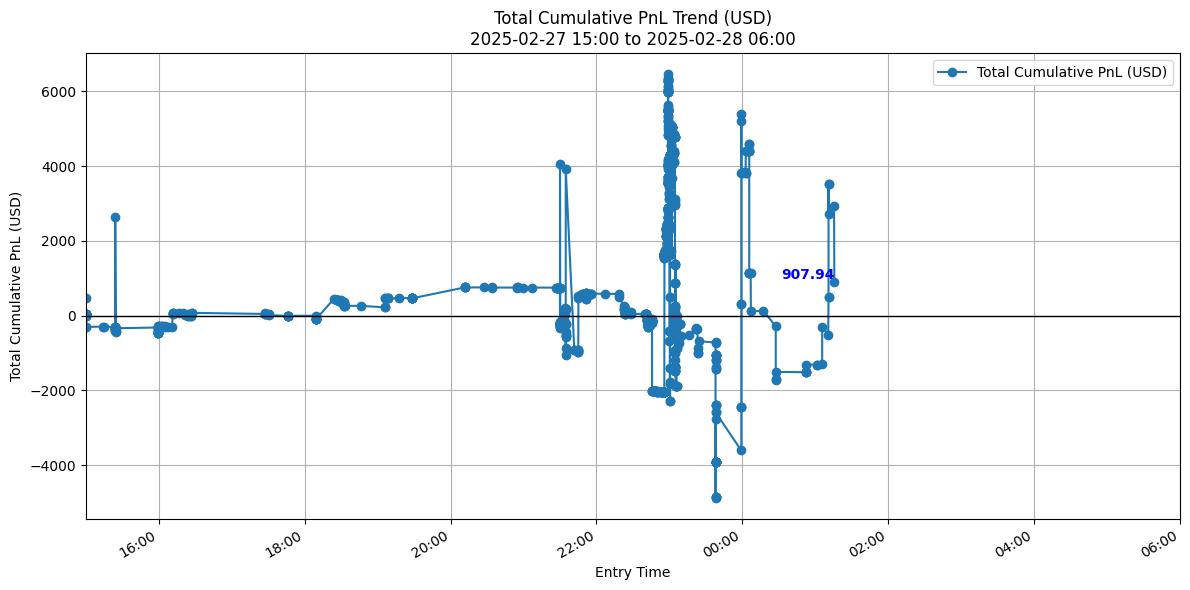

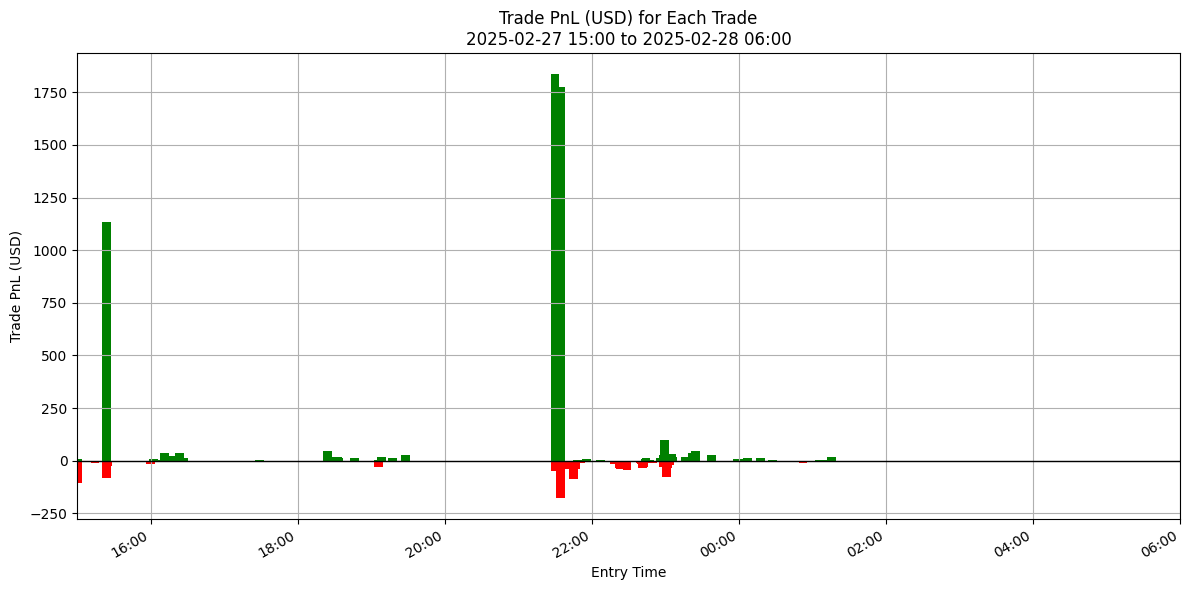

Date: 2025-03-04


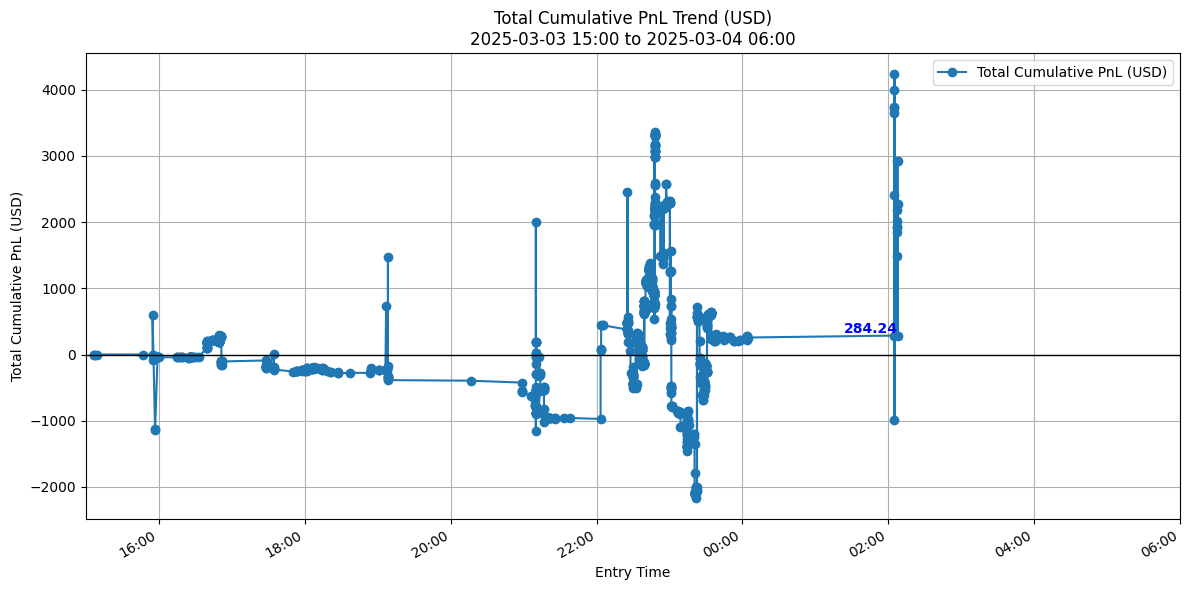

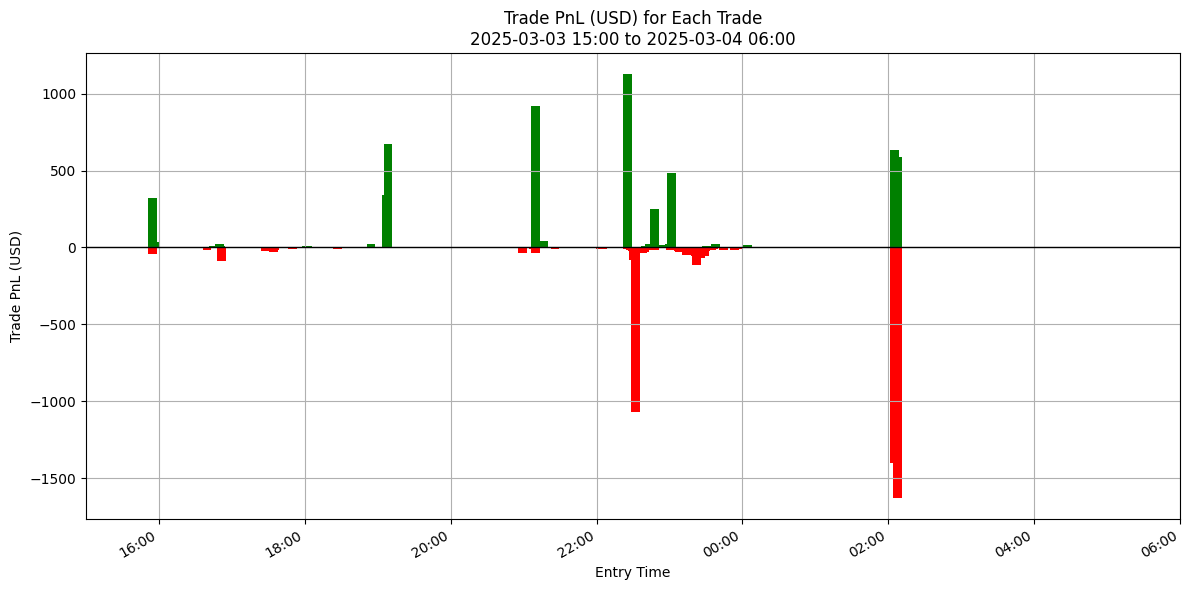

Date: 2025-03-05


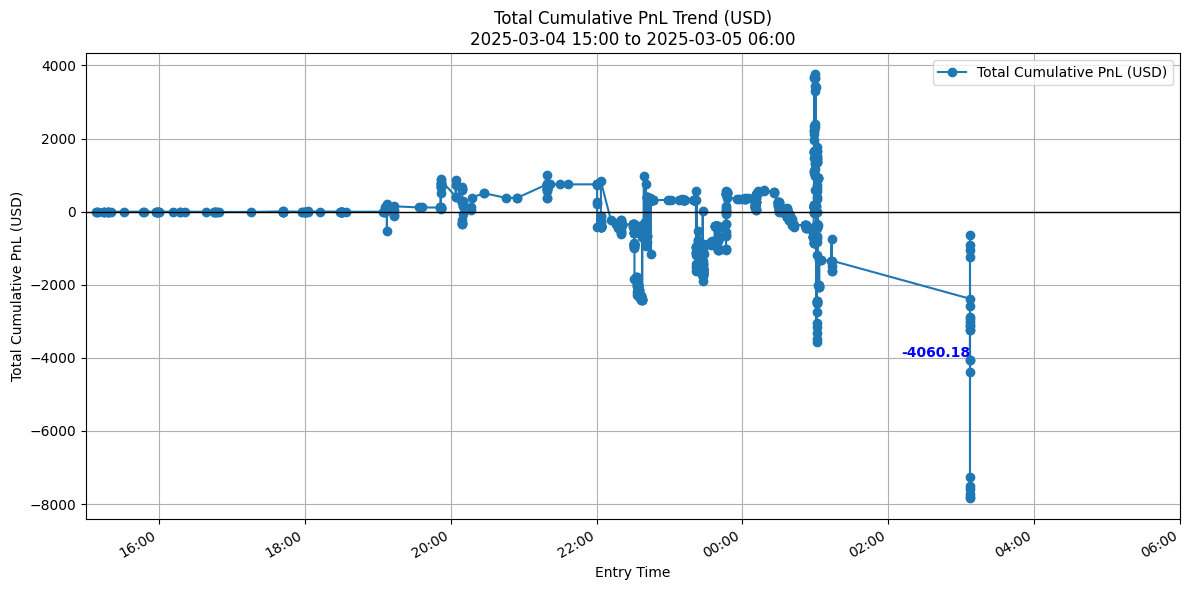

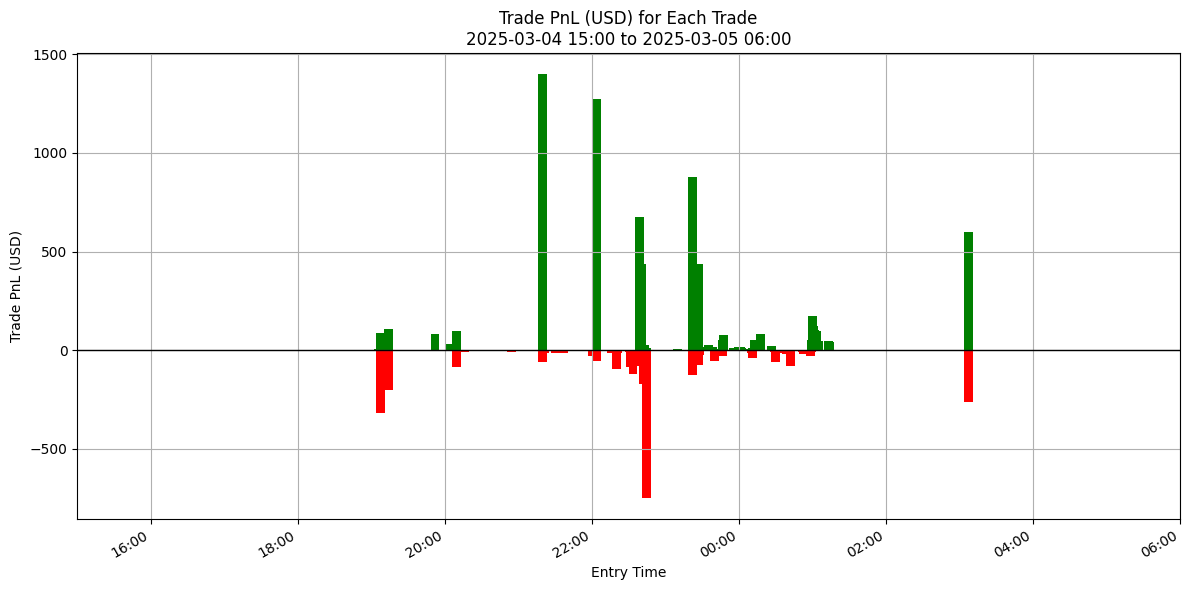

Date: 2025-03-06


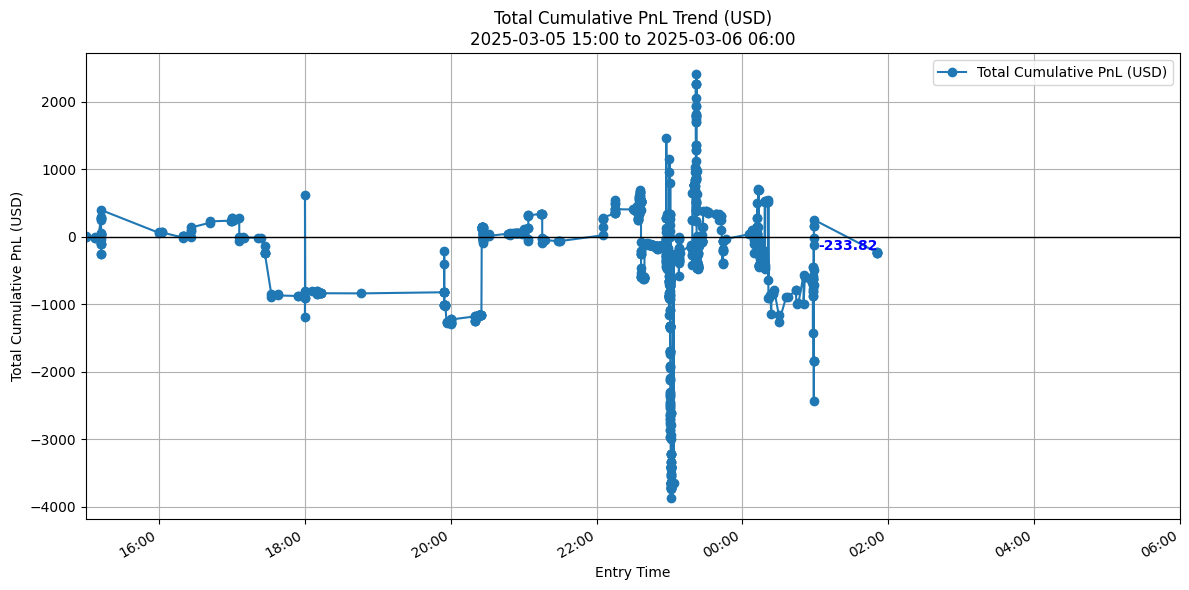

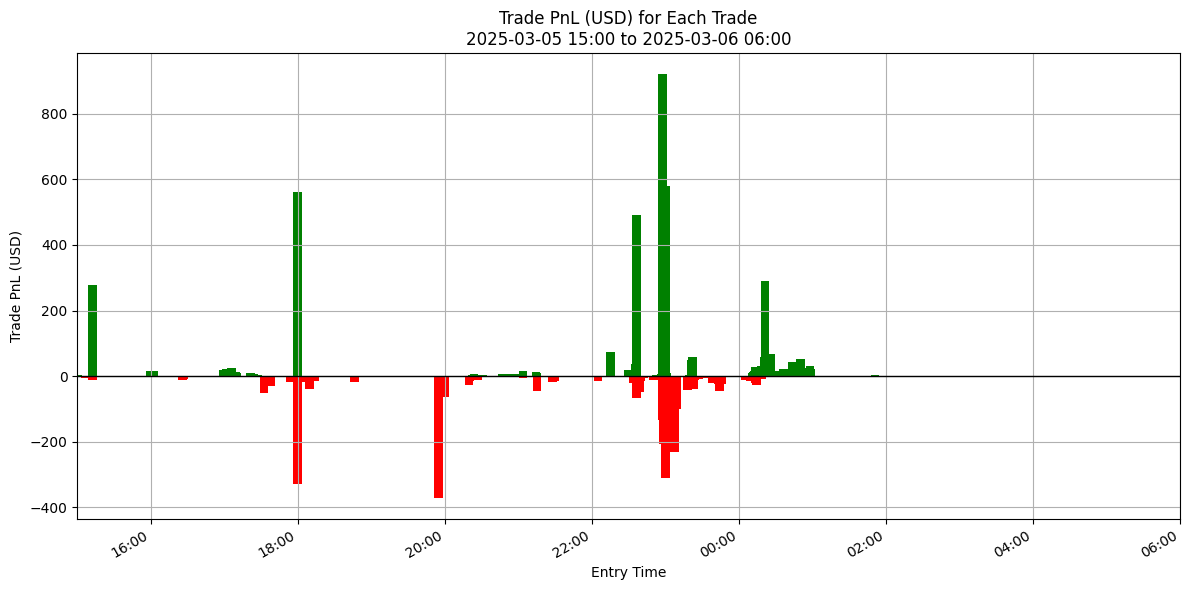

Date: 2025-03-07


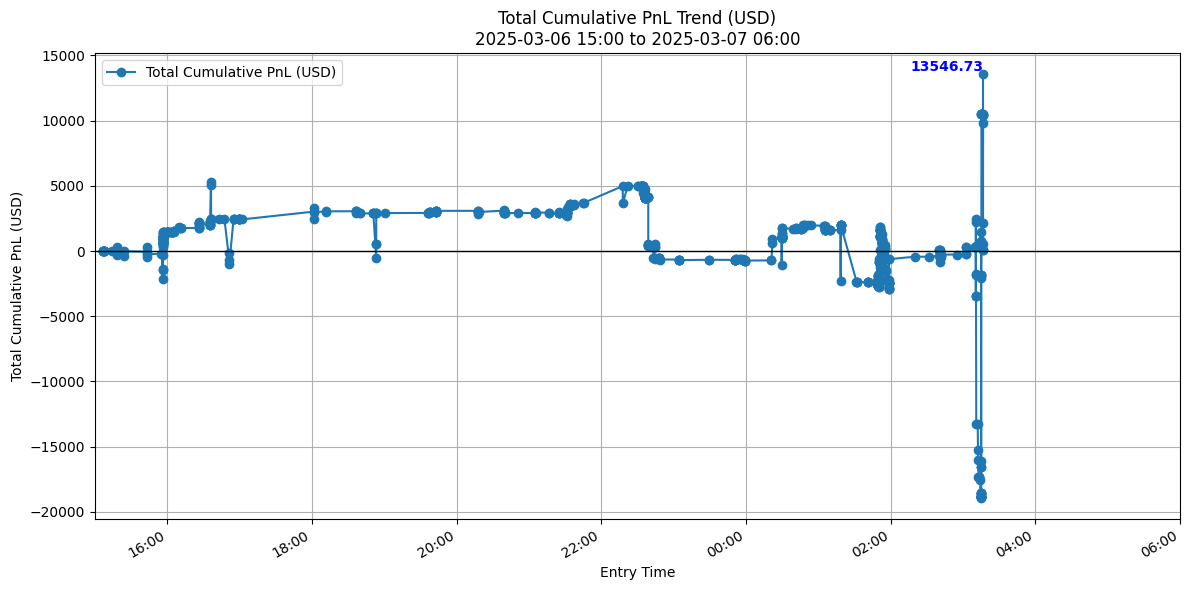

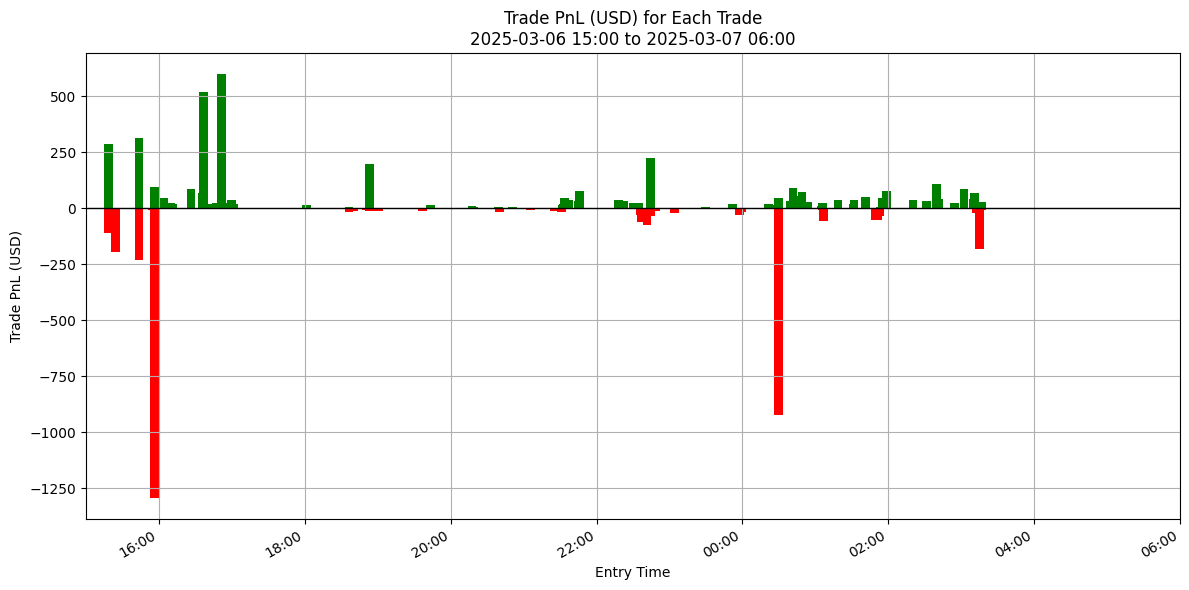

Date: 2025-03-10


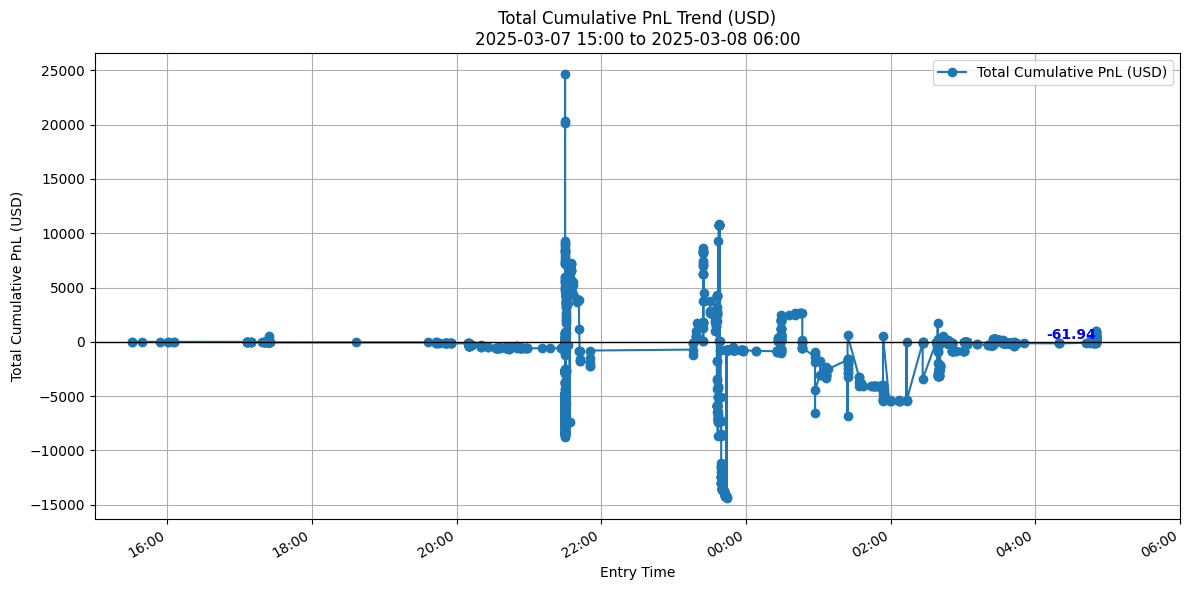

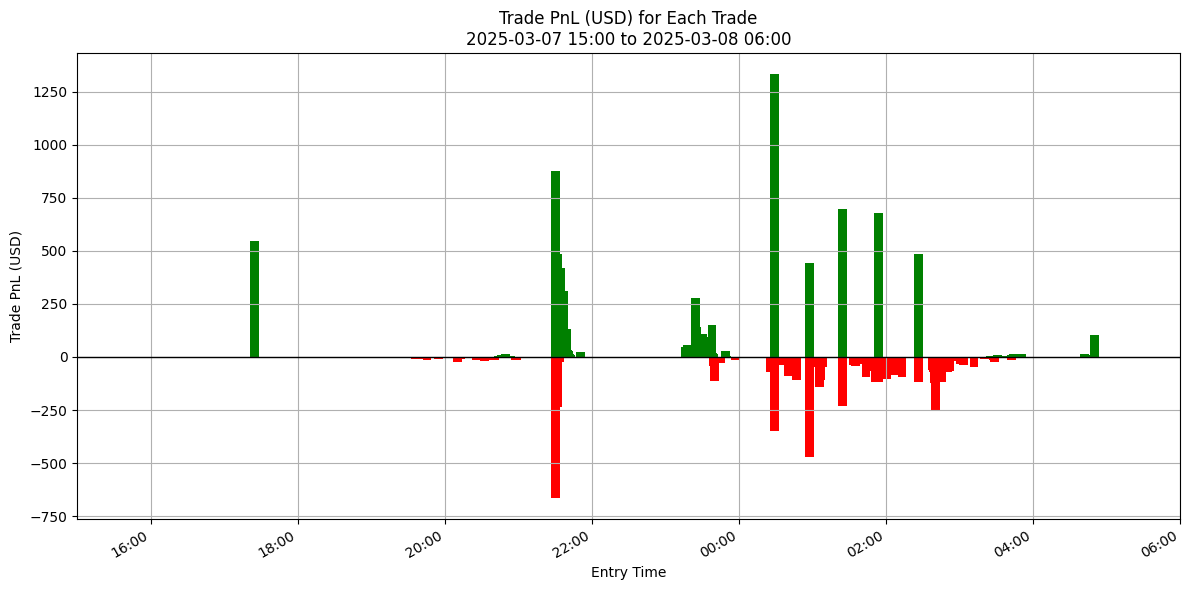

Date: 2025-03-11


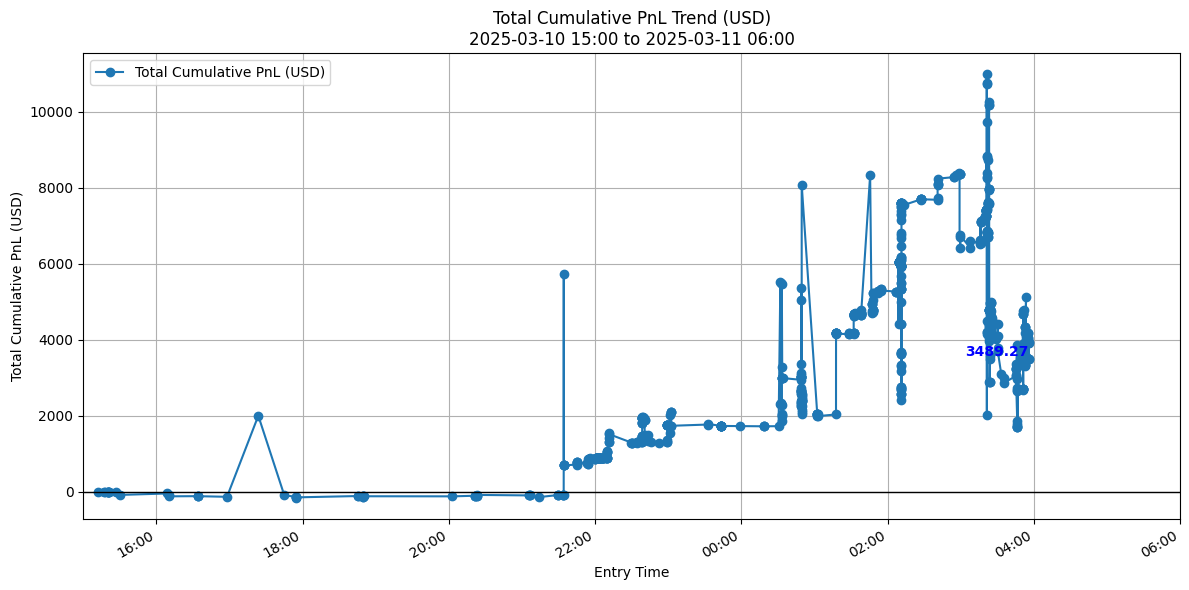

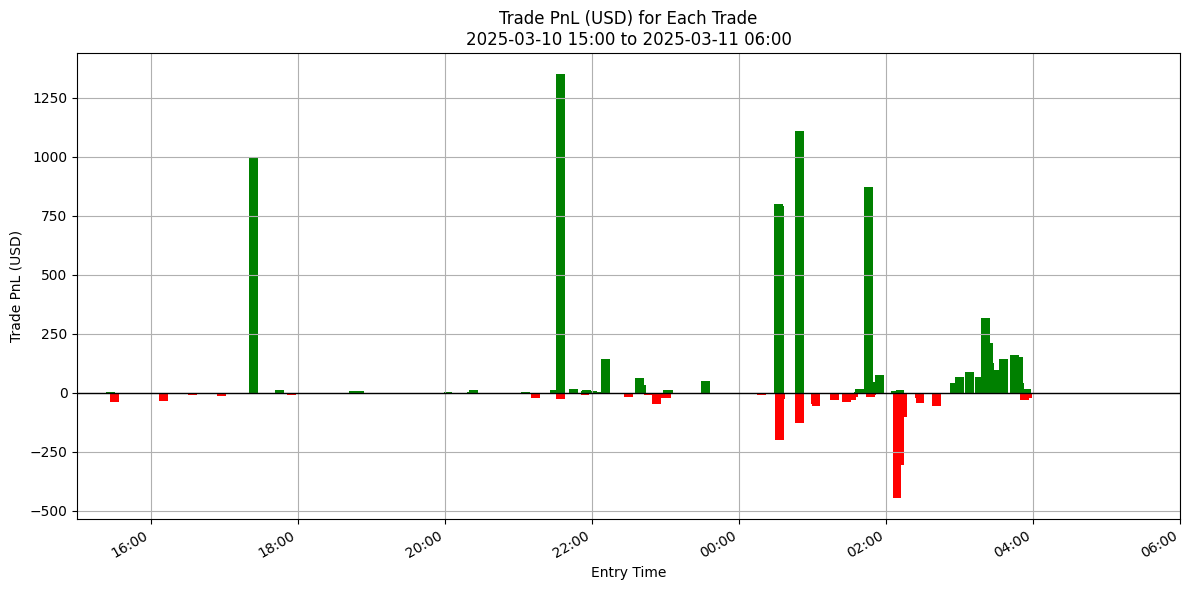

Date: 2025-03-12


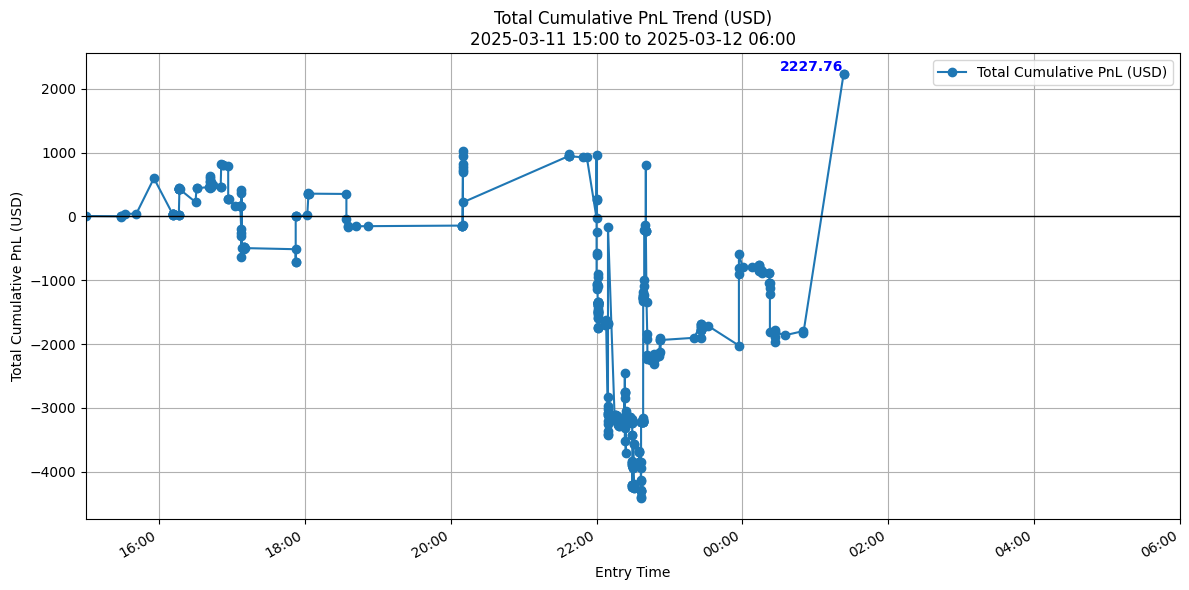

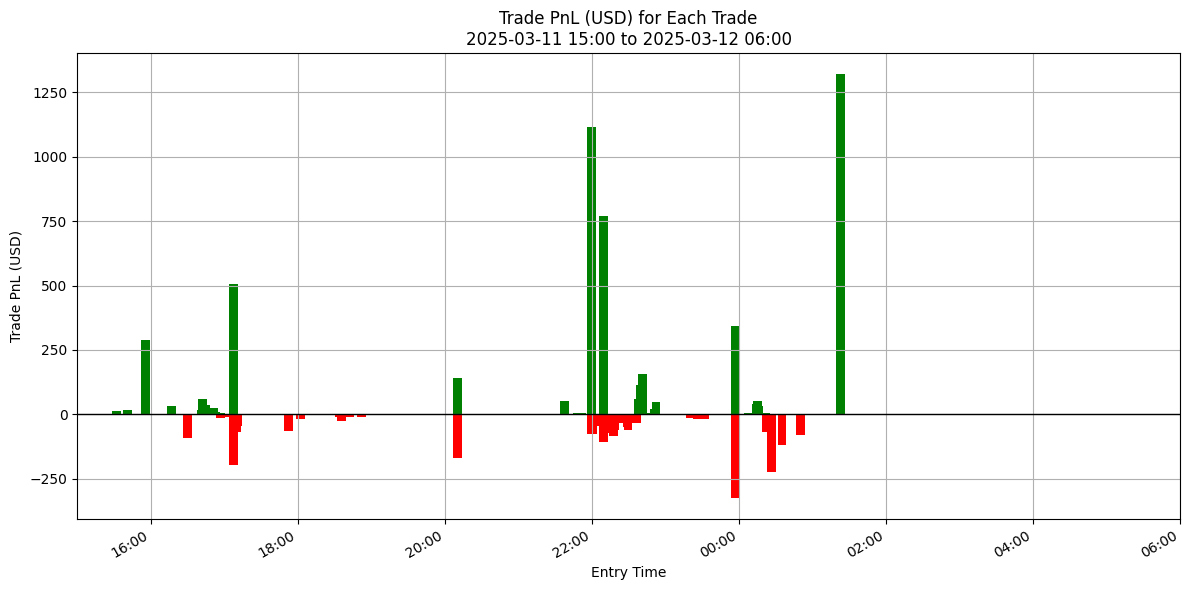

Date: 2025-03-13


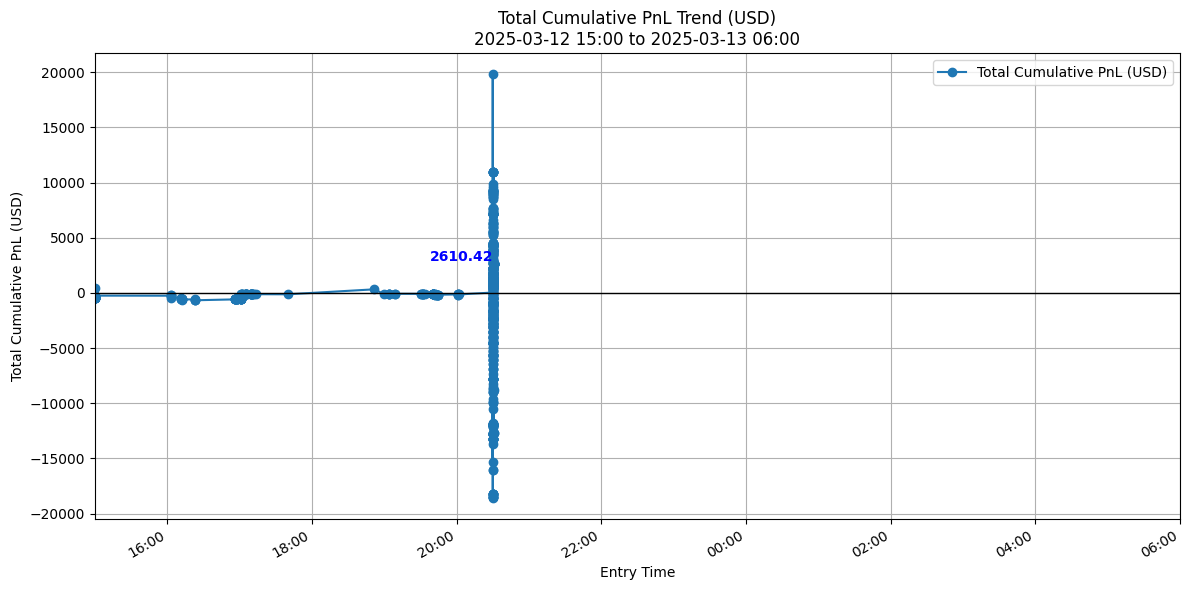

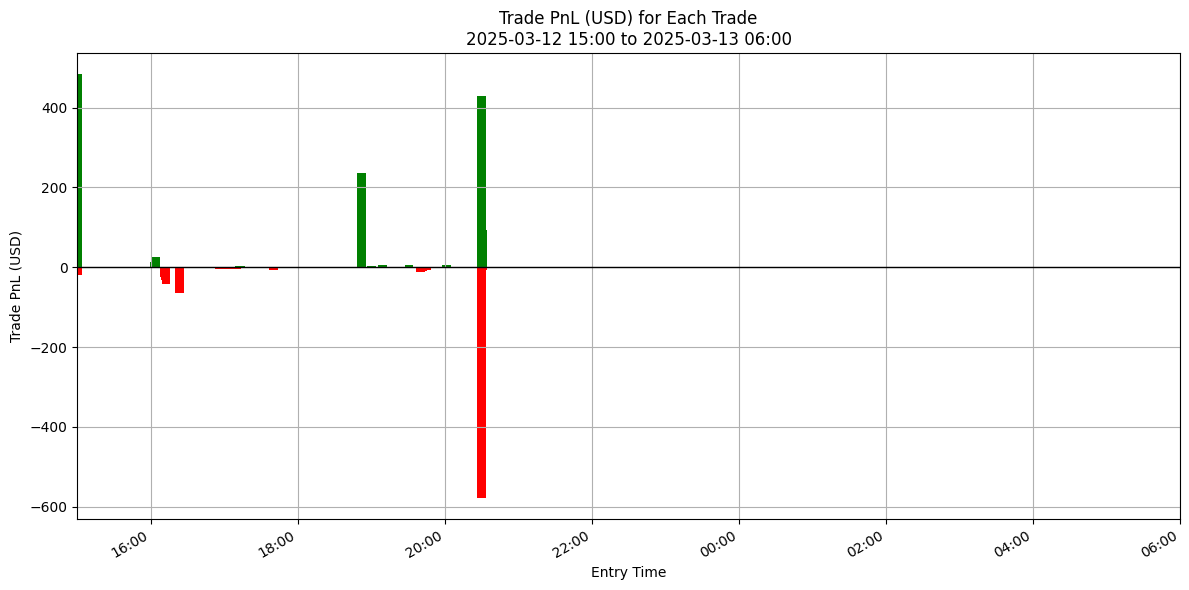

Date: 2025-03-14


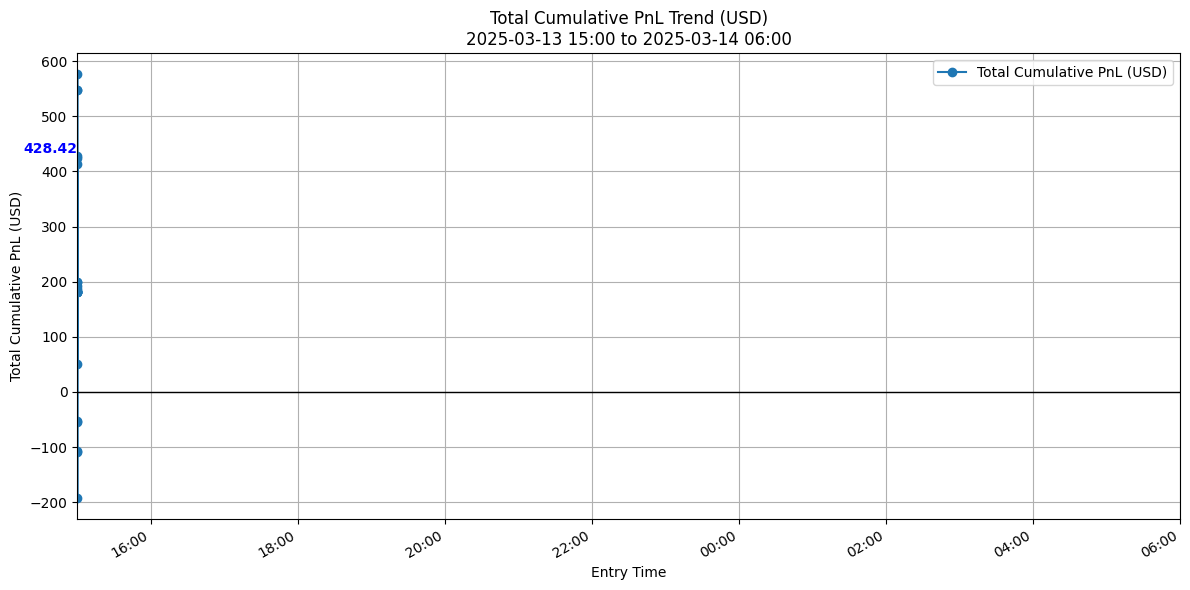

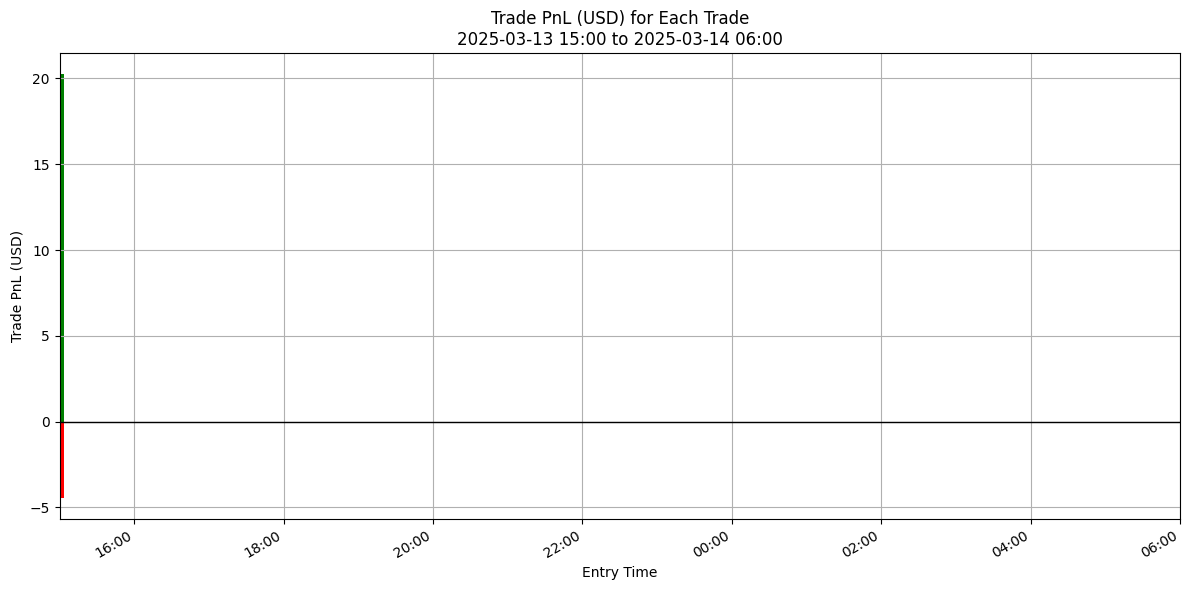

Date: 2025-03-17


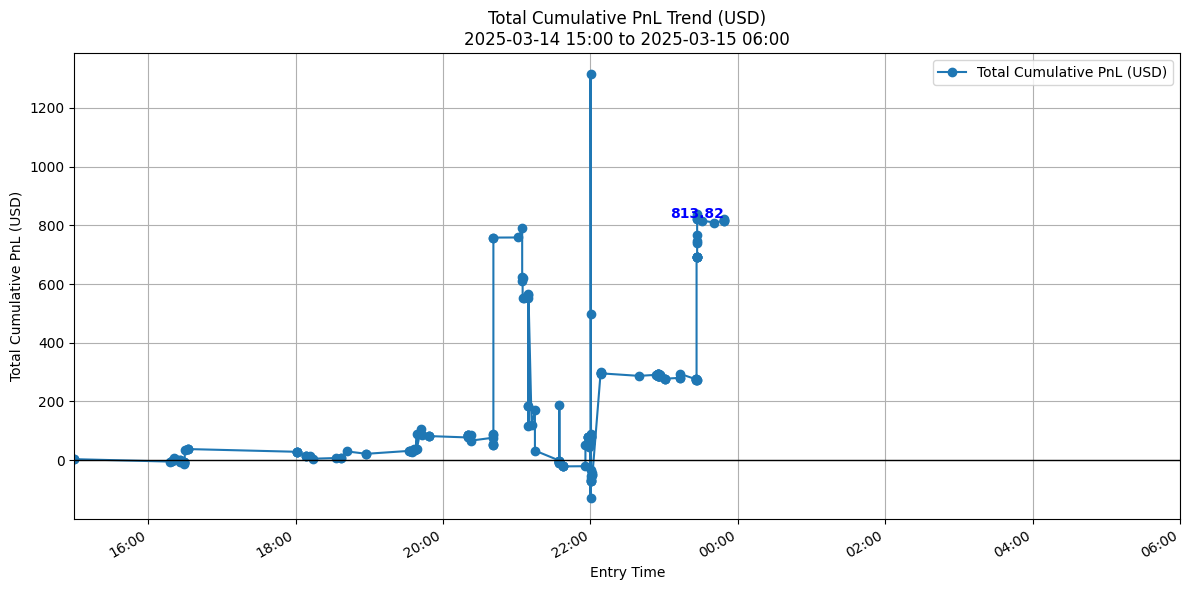

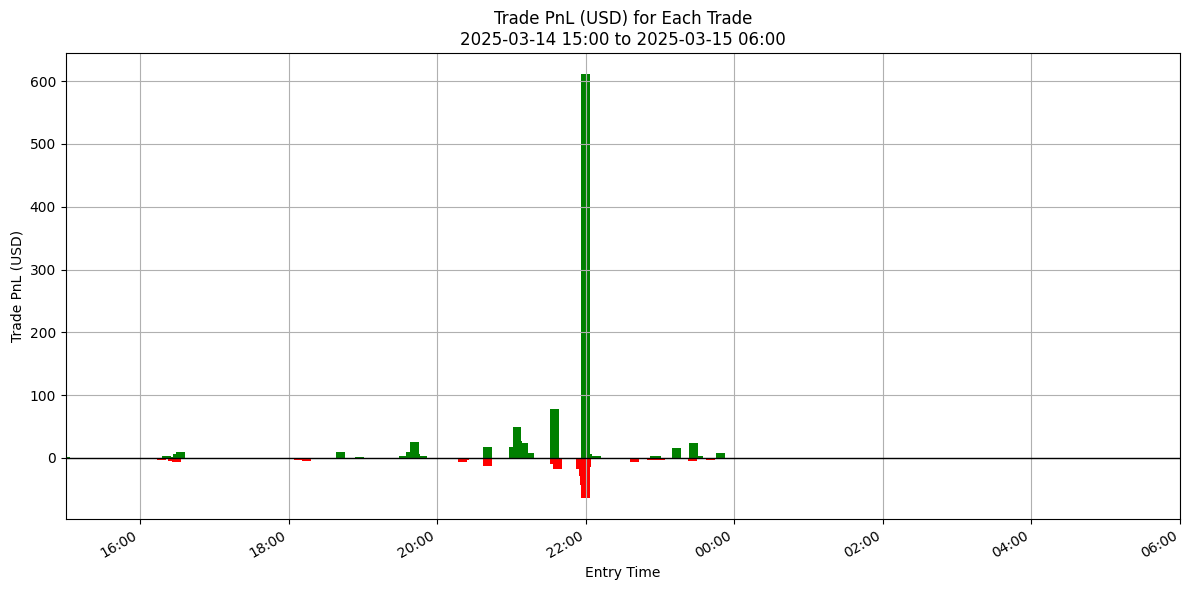

Date: 2025-03-18


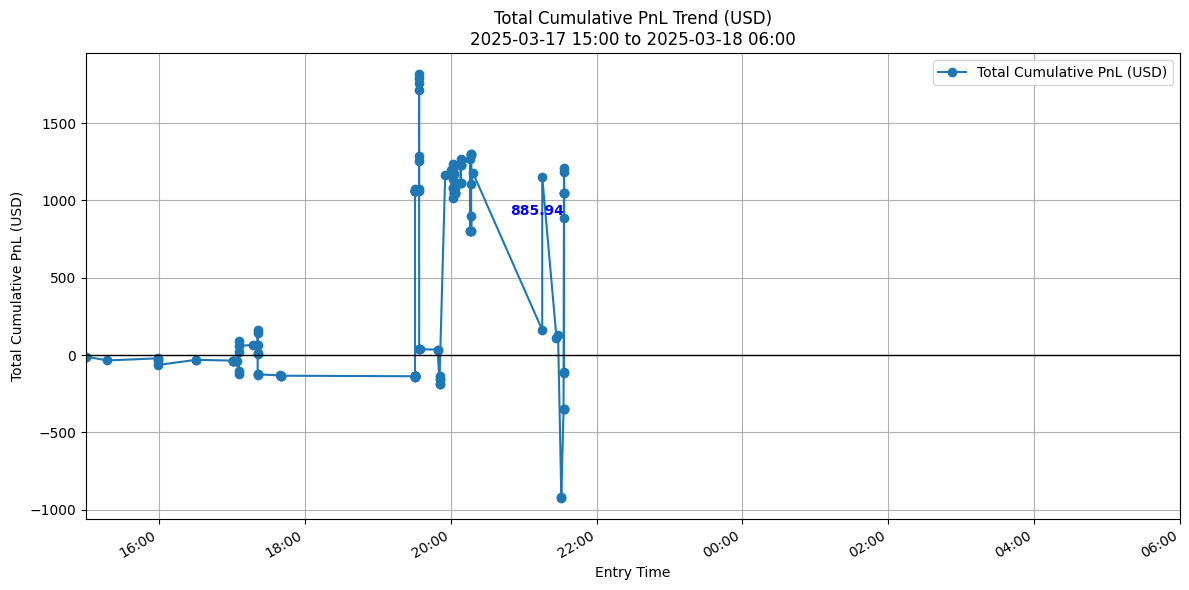

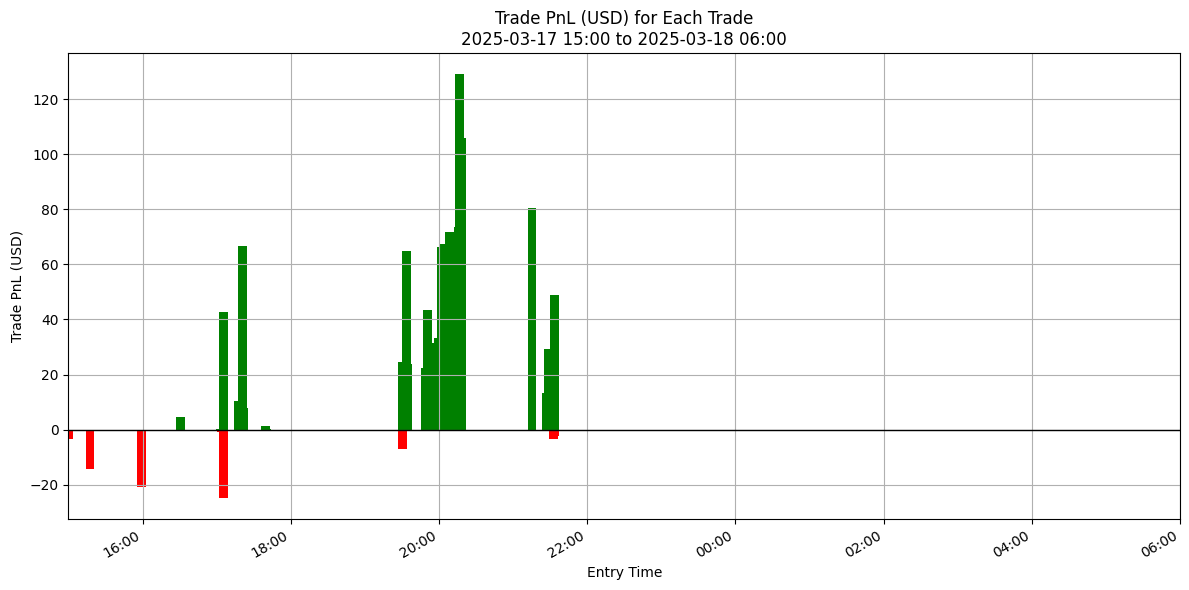

Date: 2025-03-19


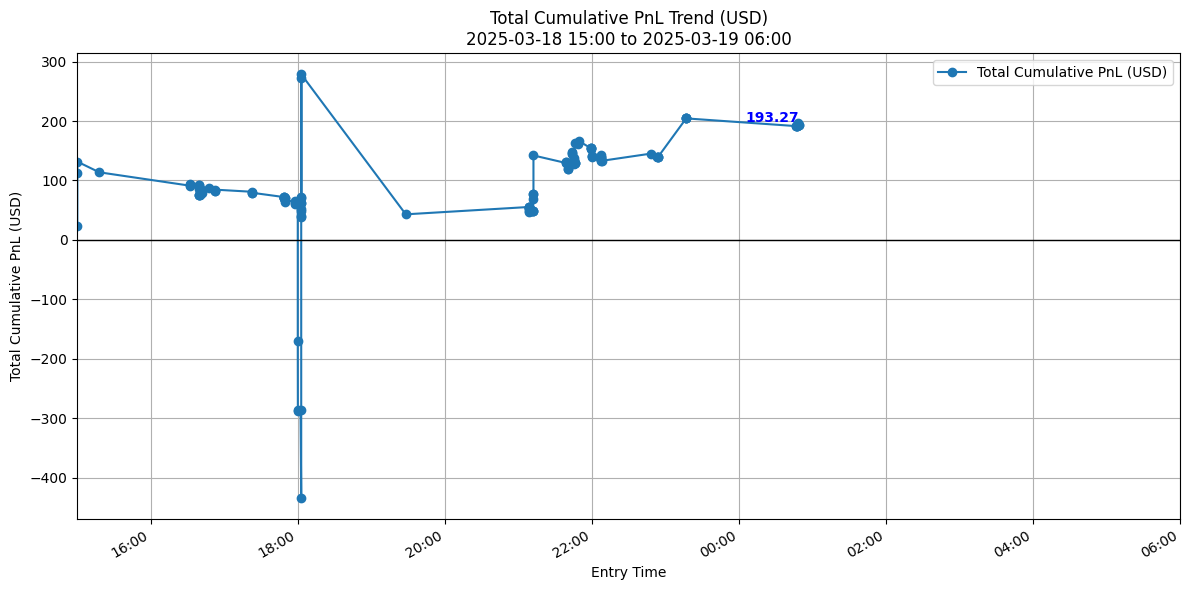

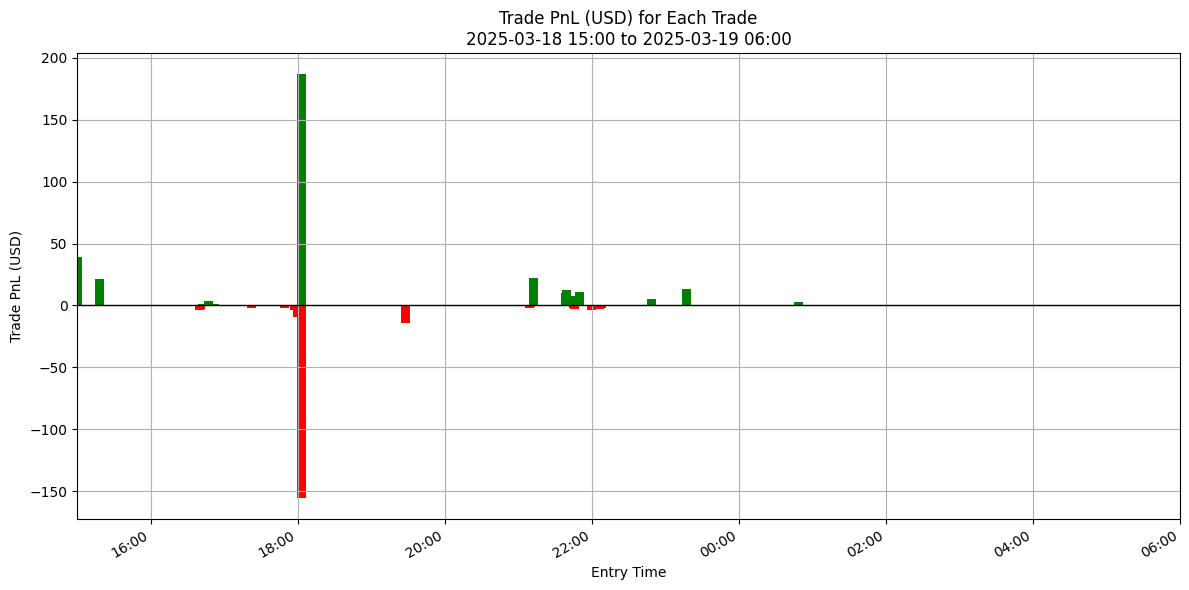

Date: 2025-03-20


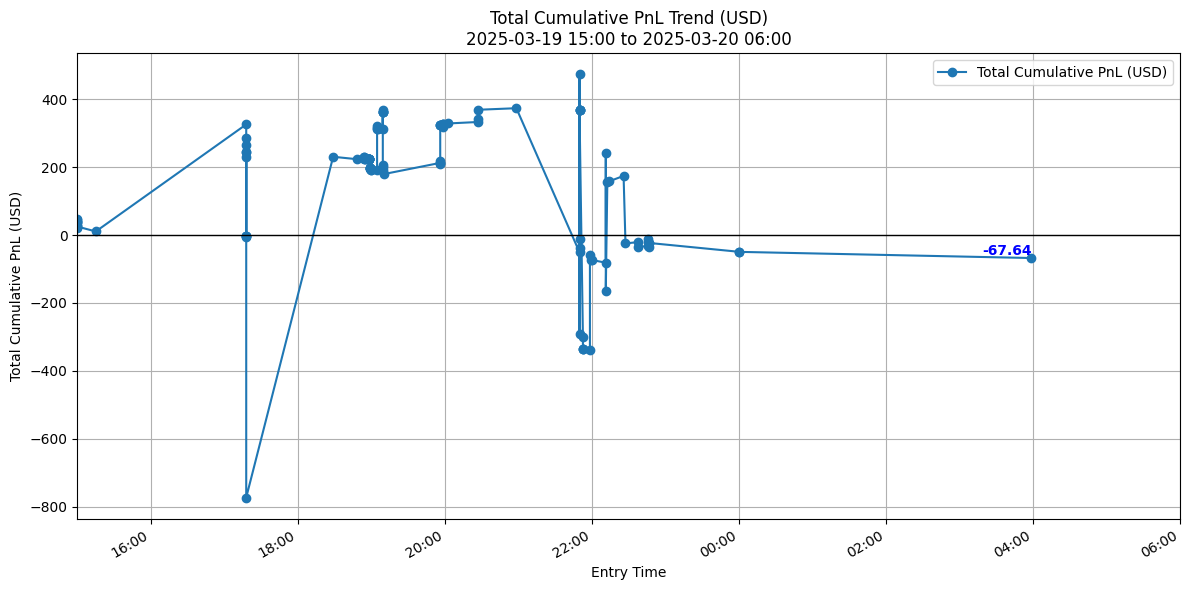

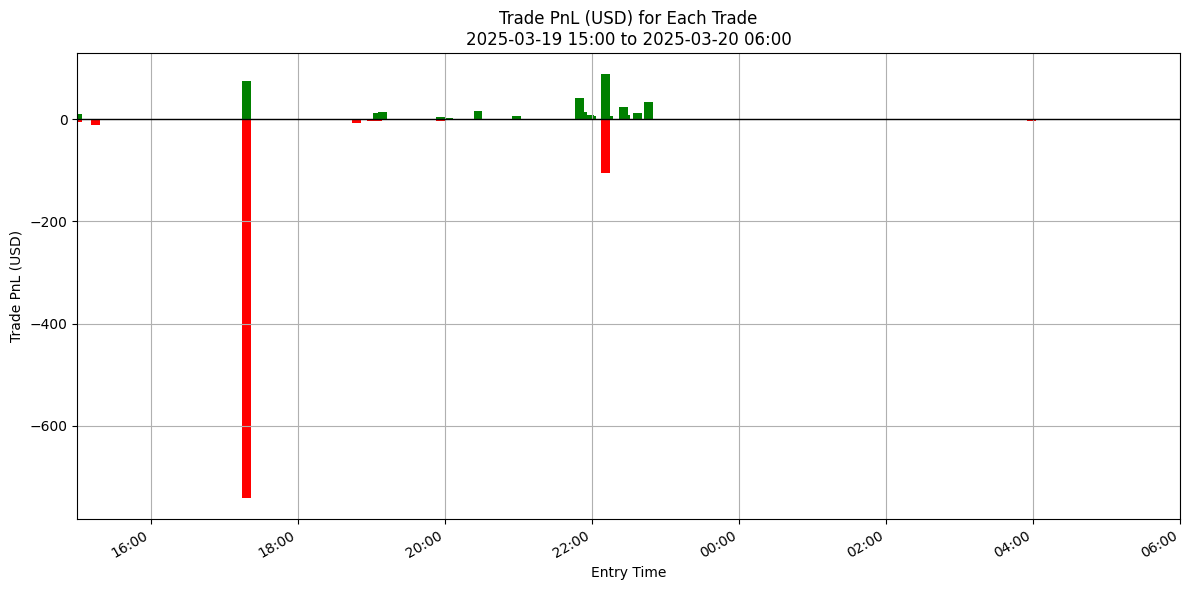

Date: 2025-03-21


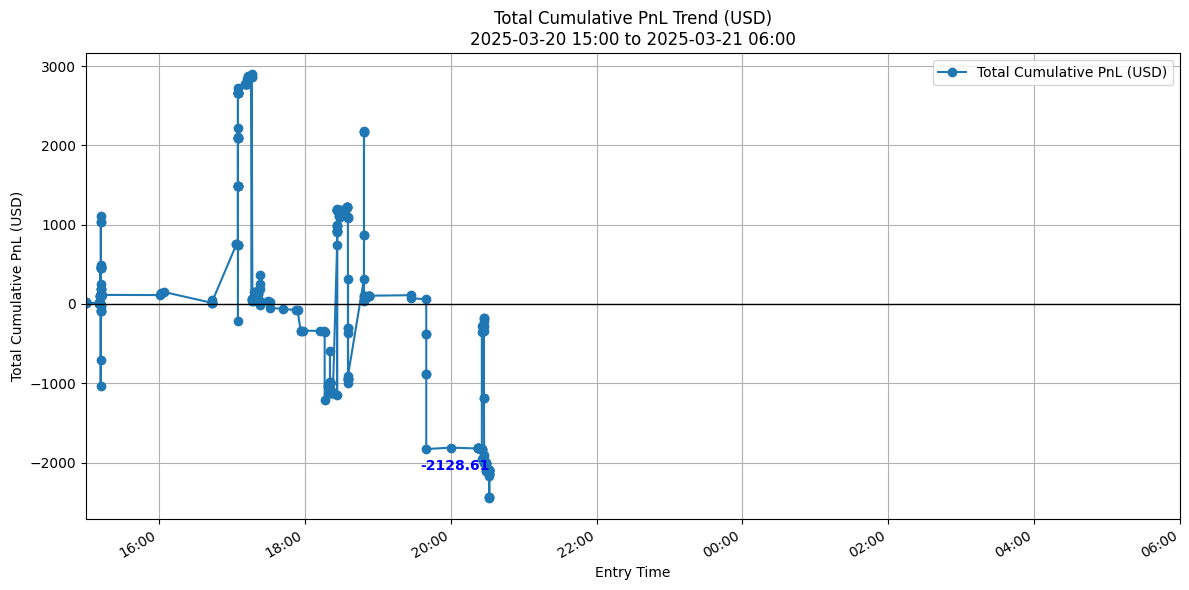

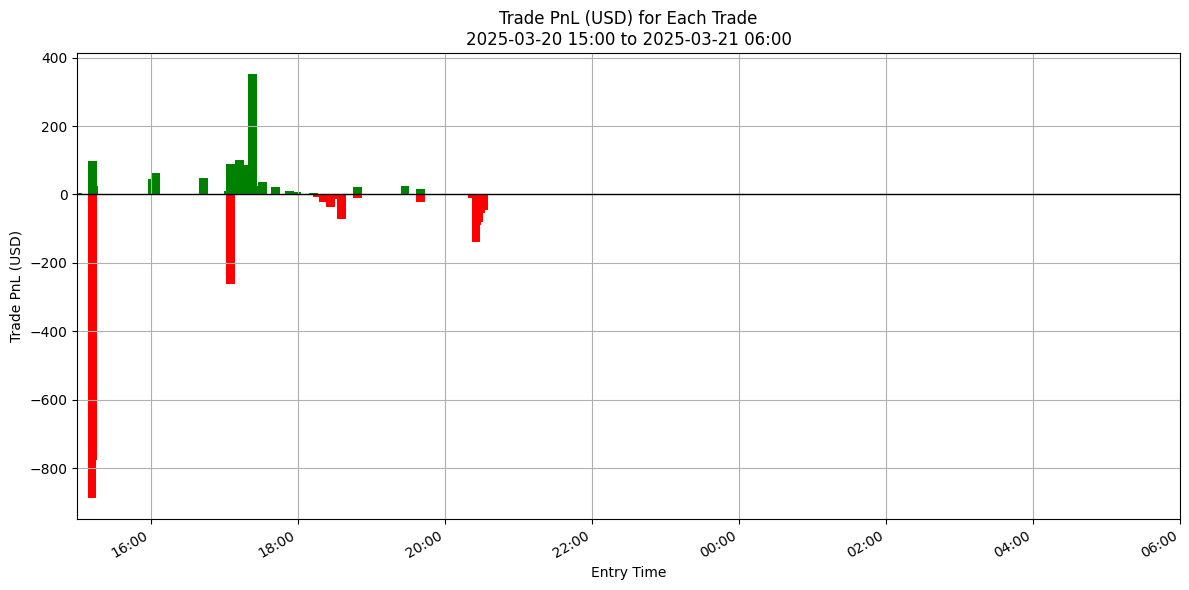

Date: 2025-03-24


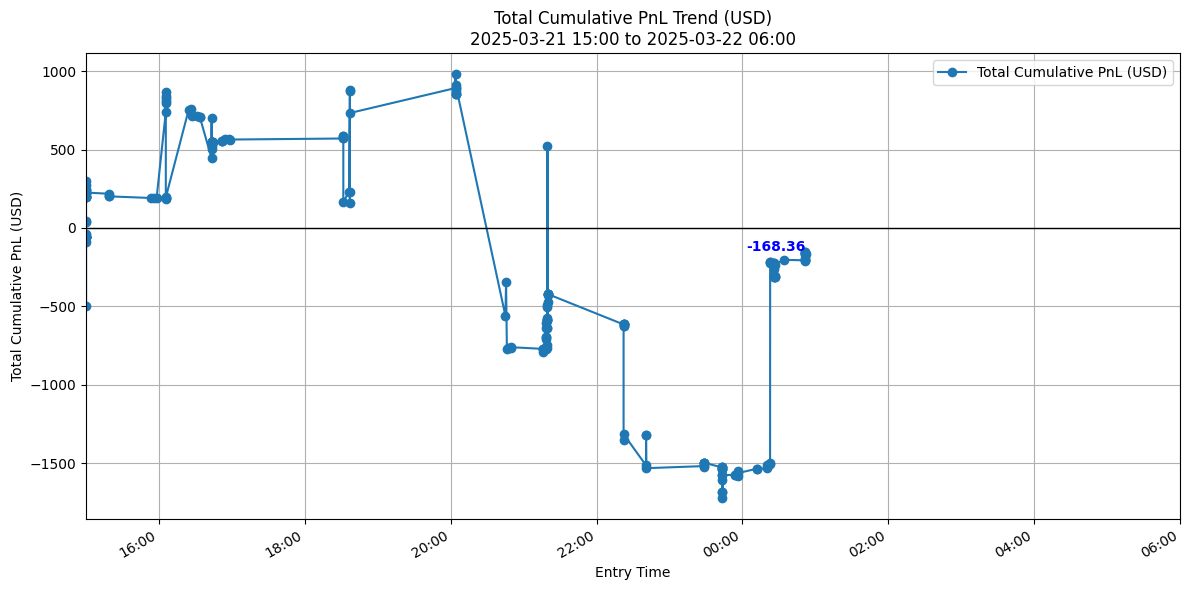

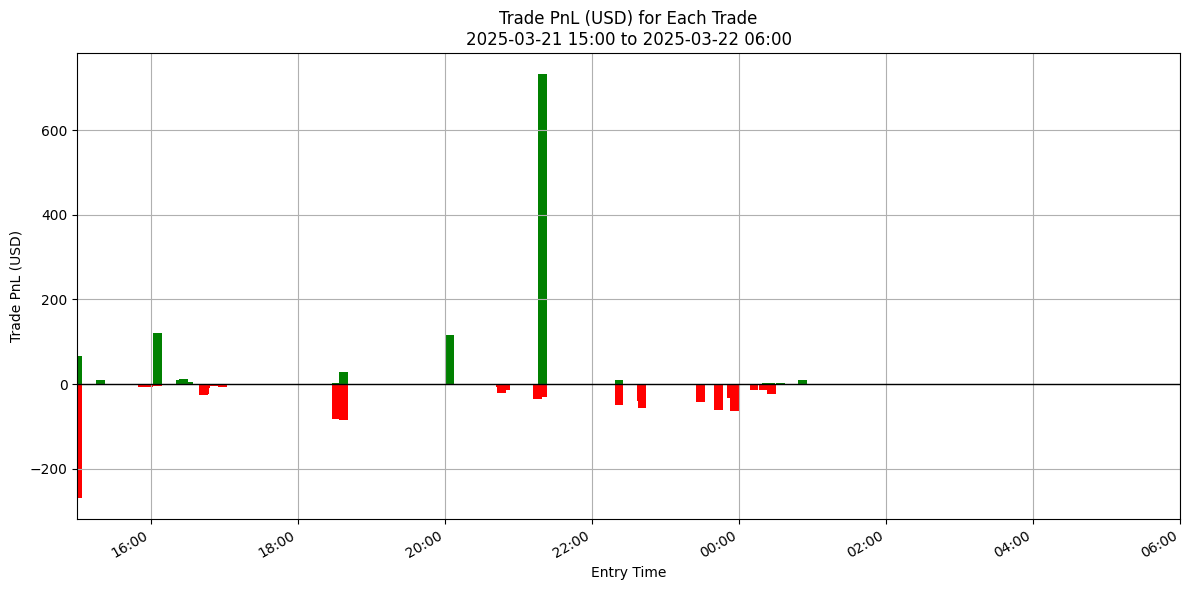

Date: 2025-03-25


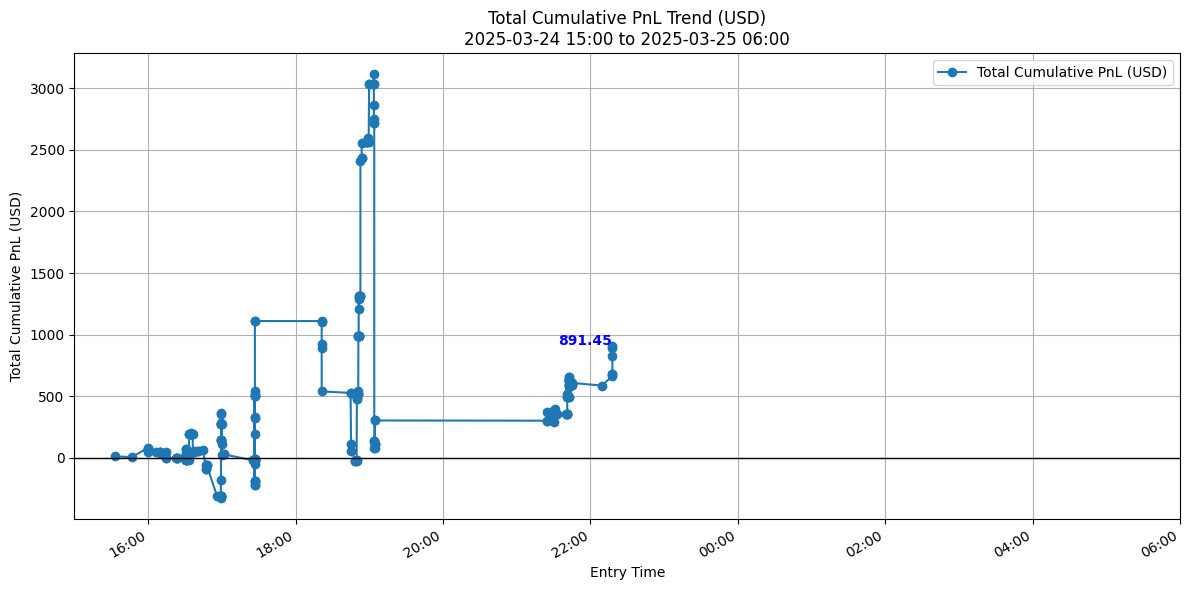

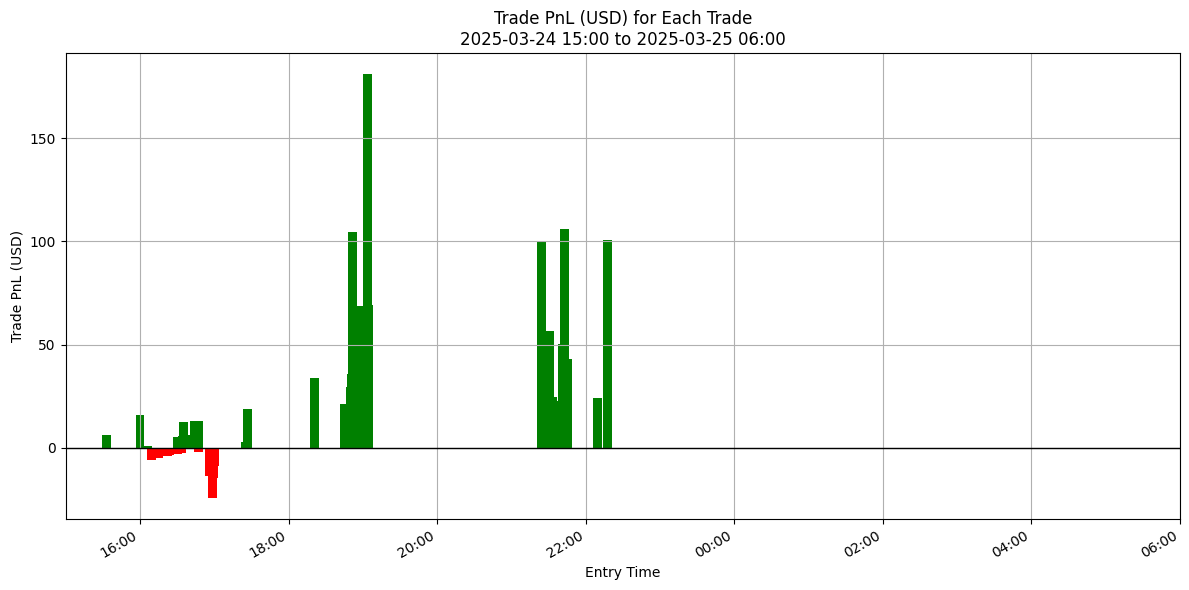

In [10]:
for date, df in pnl_dict.items():
    print(f"Date: {date}")
    show_pnl(df)
